In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)

#데이터 프레임의 데이터 슬라이싱
#X는 행전체, 2번 열부터 끝 열까지 다 사용
#Y는 행전체, 1번 열만 사용
X = df.loc[:, 2:].values
y = df.loc[:, 1].values

#정수로 인코딩(라벨인코딩)
le = LabelEncoder()

#Y => B, M 알파벳으로 되어있음. 그래서 컴퓨터가 이해할 수 있게 하기 위해서 0, 1로 바꿔주기 위한
#라벨 인코더 정의 후 학습
y = le.fit_transform(y)

#train_test_split함수로 0.2 (테스트)로, 훈련으로 나누었다.
X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                     test_size=0.20,
                     #전체 실제 데이터셋의 비율(B:M)이, 나눠지는 데이터셋에도 그대로 적용
                     stratify=y,
                     random_state=1)

In [2]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [3]:
logistic.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [4]:
#훈련한 모델로 X_test 데이터를 예측 한 후, 결과를 y_pred
y_pred = logistic.predict(X_test)
test_acc = logistic.score(X_test, y_test)

print(f'테스트 정확도 : {test_acc:.3f}')

테스트 정확도 : 0.947


## 혼동 행렬 그리기, 특이도, 민감도 구하기

In [5]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [20]:
#민감도(재현율)
recall = tp/(tp+fn)
print("민감도(재현율) :", recall)

민감도(재현율) : 0.9523809523809523


In [21]:
#특이도
specitivity = tn/(tn+fp)
print("특이도 :", specitivity)

특이도 : 0.9444444444444444


In [22]:
def get_tpr(y_true,y_scores,threshold):
    predict_positive_num = len(y_scores[y_scores >= threshold])
    tp = len([x for x in y_true[:predict_positive_num] if x == 1])
    ground_truth = len(y_true[y_true==1])
    tpr =  tp / ground_truth
    return tpr

def get_fpr(y_true,y_scores,threshold):
    predict_positive_num = len(y_scores[y_scores >= threshold] )
    fp = len([x for x in y_true[:predict_positive_num] if x == 0 ])
    ground_negative = len(y_true[y_true==0])
    fpr = fp / ground_negative
    return fpr

def roc_plot(y_true,y_scores):
    tpr , fpr = [] , []

    for _ in y_scores: # y_scores 를 thresholds 처럼 사용했음
        tpr.append(get_tpr(y_true,y_scores,_ ))
        fpr.append(get_fpr(y_true,y_scores,_ ))

    fig = plt.figure(figsize = (2,2))
    plt.plot(fpr, tpr)
    plt.scatter(fpr,tpr)
    plt.plot([0,1],[0,1])
    plt.xlabel('False-Positive-Rate')
    plt.ylabel('True-Positive-Rate')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.title('ROC Curve 2D')
    plt.show()

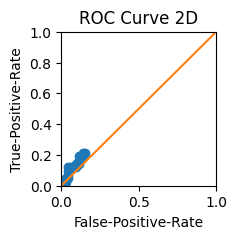

In [19]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings(action='ignore')

y_scores = np.array([0.9,0.8,0.7,0.6,0.55,0.54,0.53,0.52,0.51,0.505,0.4,0.39,0.38,0.37,0.36,0.35,0.34,0.33,0.3,0.1 ])
roc_plot(y_test, y_scores)

## 부스팅

In [23]:
import sys

# 코랩의 경우 깃허브 저장소로부터 python_environment_check.py를 다운로드 합니다.
if 'google.colab' in sys.modules:
    !wget https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/python_environment_check.py
else:
    sys.path.insert(0, '..')

--2024-05-23 11:28:45--  https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/python_environment_check.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1629 (1.6K) [text/plain]
Saving to: ‘python_environment_check.py’

python_environment_ 100%[===================>]   1.59K  --.-KB/s    in 0s      

2024-05-23 11:28:45 (18.6 MB/s) - ‘python_environment_check.py’ saved [1629/1629]



In [24]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


iris = datasets.load_iris()
X, y = iris.data[50:, [1, 2]], iris.target[50:]
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test =\
       train_test_split(X, y,
                        test_size=0.5,
                        random_state=1,
                        stratify=y)

In [25]:
#약한 분류기 여러 개 임포트
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline

In [27]:
mo1 = LogisticRegression(penalty='l2',
                         C=0.001,
                         solver='lbfgs',
                         random_state=1)

mo2 = DecisionTreeClassifier(max_depth=1,
                             criterion='entropy',
                             random_state=0)

mo3 = KNeighborsClassifier(n_neighbors=1,
                           p=2,
                           metric='minkowski')

In [28]:
from sklearn.preprocessing import StandardScaler

pip1 = Pipeline([['sc', StandardScaler()],
                 ['mo1',mo1]])

pip3 = Pipeline([['sc', StandardScaler()],
                 ['mo3', mo3]])

clf_labels = ['Logistic regression', 'Decision tree', 'KNN']

from sklearn.model_selection import cross_val_score
print('10-겹 교차 검증:\n')


for clf, label in zip([pip1, mo2, pip3], clf_labels):

    #교차검증 cross_val_score
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print(f'ROC AUC: {scores.mean():.2f} '
          f'(+/- {scores.std():.2f}) [{label}]')

10-겹 교차 검증:

ROC AUC: 0.92 (+/- 0.15) [Logistic regression]
ROC AUC: 0.87 (+/- 0.18) [Decision tree]
ROC AUC: 0.85 (+/- 0.13) [KNN]


In [32]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator


class MajorityVoteClassifier(BaseEstimator,
                             ClassifierMixin):
    """다수결 투표 앙상블 분류기

    매개변수
    ----------
    classifiers : 배열 타입, 크기 = [n_classifiers]
        앙상블에 사용할 분류기

    vote : str, {'classlabel', 'probability'}
        기본값: 'classlabel'
        'classlabel'이면 예측은 다수인 클래스 레이블의 인덱스가 됩니다
        'probability'면 확률 합이 가장 큰 인덱스로
        클래스 레이블을 예측합니다(보정된 분류기에 추천합니다)

    weights : 배열 타입, 크기 = [n_classifiers]
        선택 사항, 기본값: None
        'int' 또는 'float' 값의 리스트가 주어지면 분류기가 이 중요도로 가중치됩니다
        'weights=None'이면 동일하게 취급합니다

    """
    def __init__(self, classifiers, vote='classlabel', weights=None):

        self.classifiers = classifiers
        self.named_classifiers = {key: value for key, value
                                  in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights

    def fit(self, X, y):
        """분류기를 훈련합니다

        매개변수
        ----------
        X : {배열 타입, 희소 행렬},
            크기 = [n_samples, n_features]
            훈련 샘플 행렬

        y : 배열 타입, 크기 = [n_samples]
            타깃 클래스 레이블 벡터

        반환값
        -------
        self : 객체

        """
        if self.vote not in ('probability', 'classlabel'):
            raise ValueError(f"vote는 'probability' 또는 'classlabel'이어야 합니다"
                             f"; vote={self.vote}가 입력되었습니다.")

        if self.weights and len(self.weights) != len(self.classifiers):
            raise ValueError(f'분류기와 가중치 개수는 같아야 합니다'
                             f'; 가중치 {len(self.weights)}개,'
                             f' 분류기 {len(self.classifiers)} 개')

        # self.predict 메서드에서 np.argmax를 호출할 때
        # 클래스 레이블이 0부터 시작되어야 하므로 LabelEncoder를 사용합니다
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X, self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self

    def predict(self, X):
        """X에 대한 클래스 레이블을 예측합니다

        매개변수
        ----------
        X : {배열 타입, 희소 행렬},
            크기 = [n_samples, n_features]
            샘플 데이터 행렬

        반환값
        ----------
        maj_vote : 배열 타입, 크기 = [n_samples]
            예측된 클래스 레이블

        """
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else:  # 'classlabel' 투표

            # clf.predict 메서드를 사용하여 결과를 모읍니다
            predictions = np.asarray([clf.predict(X)
                                      for clf in self.classifiers_]).T

            maj_vote = np.apply_along_axis(
                                      lambda x:
                                      np.argmax(np.bincount(x,
                                                weights=self.weights)),
                                      axis=1,
                                      arr=predictions)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote

    def predict_proba(self, X):
        """X에 대한 클래스 확률을 예측합니다

        매개변수
        ----------
        X : {배열 타입, 희소 행렬},
            크기 = [n_samples, n_features]
            n_samples는 샘플의 개수고 n_features는 특성의 개수인
            샘플 데이터 행렬

        반환값
        ----------
        avg_proba : 배열 타입,
            크기 = [n_samples, n_classes]
            샘플마다 가중치가 적용된 클래스의 평균 확률

        """
        probas = np.asarray([clf.predict_proba(X)
                             for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0, weights=self.weights)
        return avg_proba

    def get_params(self, deep=True):
        """GridSearch를 위해 분류기의 매개변수 이름을 반환합니다"""
        if not deep:
            return super().get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in self.named_classifiers.items():
                for key, value in step.get_params(deep=True).items():
                    out[f'{name}__{key}'] = value
            return out

In [33]:
# 다수결 (하드) 투표

mv_clf = MajorityVoteClassifier(classifiers=[pip1, mo2, pip3])

clf_labels += ['Majority voting']
all_clf = [pip1, mo2, pip3, mv_clf]

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print(f'ROC AUC: {scores.mean():.2f} '
          f'(+/- {scores.std():.2f}) [{label}]')

ROC AUC: 0.92 (+/- 0.15) [Logistic regression]
ROC AUC: 0.87 (+/- 0.18) [Decision tree]
ROC AUC: 0.85 (+/- 0.13) [KNN]
ROC AUC: 0.98 (+/- 0.05) [Majority voting]


## 그리드 서치

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

sv = SVC(random_state=1)
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'C' : param_range,
               'kernel':['linear']},
              {'C': param_range,
               'gamma':param_range,
               'kernel':['rbf']}]

gs = GridSearchCV(estimator=sv,
                  param_grid = param_grid,
                  scoring='accuracy',
                  refit=True,
                  cv=10)

gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9400000000000001
{'C': 10.0, 'kernel': 'linear'}
